<a href="https://colab.research.google.com/github/Aniket0325/Delhivery_Project/blob/main/Business_Case_Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aniket Chavan**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv'

In [9]:
df = pd.read_csv(file)
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714


In [10]:
df.shape

(144867, 24)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [12]:
df.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


Dropping off the unknown fields

In [13]:
unknown_fields = ['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor']
df.drop(unknown_fields, axis=1, inplace=True)

In [14]:
for i in df.columns:
  print(f"Unique entry for {i:<30} = {df[i].nunique()}")

Unique entry for data                           = 2
Unique entry for trip_creation_time             = 14817
Unique entry for route_schedule_uuid            = 1504
Unique entry for route_type                     = 2
Unique entry for trip_uuid                      = 14817
Unique entry for source_center                  = 1508
Unique entry for source_name                    = 1498
Unique entry for destination_center             = 1481
Unique entry for destination_name               = 1468
Unique entry for od_start_time                  = 26369
Unique entry for od_end_time                    = 26369
Unique entry for start_scan_to_end_scan         = 1915
Unique entry for actual_distance_to_destination = 144515
Unique entry for actual_time                    = 3182
Unique entry for osrm_time                      = 1531
Unique entry for osrm_distance                  = 138046
Unique entry for segment_actual_time            = 747
Unique entry for segment_osrm_time              = 214
Unique ent

COnverting datatypes of columns to categories where entries are only 2

In [15]:
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [16]:
floating_values = ['actual_distance_to_destination','actual_time','osrm_time','osrm_distance',
                   'segment_actual_time','segment_osrm_time','segment_osrm_distance']
for i in floating_values:
  print(round(df[i].max(),1))

1927.4
4532.0
1686.0
2326.2
3051.0
1611.0
2191.4


Since max entry value is small, we can update datatype to float32

In [17]:
for i in floating_values:
  df[i] = df[i].astype('float32')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   data                            144867 non-null  category
 1   trip_creation_time              144867 non-null  object  
 2   route_schedule_uuid             144867 non-null  object  
 3   route_type                      144867 non-null  category
 4   trip_uuid                       144867 non-null  object  
 5   source_center                   144867 non-null  object  
 6   source_name                     144574 non-null  object  
 7   destination_center              144867 non-null  object  
 8   destination_name                144606 non-null  object  
 9   od_start_time                   144867 non-null  object  
 10  od_end_time                     144867 non-null  object  
 11  start_scan_to_end_scan          144867 non-null  float64 
 12  ac

changing the datatype of floating_values leads to reduce the memory usage

#**1. Basic data cleaning and exploration**

**1. Removing missing values in the data**

In [19]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [20]:
missing_source_names_center = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing_source_names_center

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [21]:
missing_destination_names_center = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
missing_destination_names_center

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [22]:
count = 1
for i in missing_source_names_center:
  df.loc[(df['source_center'] == i) & (df['source_name'].isnull()), 'source_name'] = f'source_{count}'
  count += 1

In [23]:
count = 1  # Initialize the counter
for i in missing_destination_names_center:
    df.loc[(df['destination_center'] == i) & (df['destination_name'].isna()),'destination_name'] = f'location_{count}'
    count += 1


In [24]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


**2. Updating datatype of datetime columns**

In [25]:
datetime_columns = ['trip_creation_time','od_start_time','od_end_time']
for i in datetime_columns:
  df[i] = pd.to_datetime(df[i])

**3. Analysis of structure & characteristics of the dataset**

In [26]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,234.073380,416.927521,213.868286,284.771301,36.196110,18.507547,22.829018
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809
std,NaN,NaN,NaN,1037.012769,344.979126,598.096069,308.004333,421.117462,53.566002,14.770471,17.860197


In [27]:
df.describe(include='object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1508,1481,1481
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


#**2. Merging the rows & Aggregating the fields**

#####**2.1 Grouping by sub-journey in the trip**

In [28]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
segment_col = ['segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
for col in segment_col:
  df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df[[col + '_sum' for col in segment_col]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.965300
1,24.0,20.0,21.724300
2,40.0,27.0,32.539497
3,61.0,39.0,45.561897
4,67.0,44.0,49.477200
...,...,...,...
144862,92.0,94.0,65.348701
144863,118.0,115.0,82.721199
144864,138.0,149.0,103.426498
144865,155.0,176.0,122.315002


#####**2.2 Aggregating at sub-journey level**

In [29]:
create_segment_dict = {
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
}

In [30]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by = ['segment_key', 'od_end_time'], ascending = True).reset_index()
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,670.620483,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,649.852783,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,28.199501,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,55.989899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,317.740784,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.521301,49.0,42.143101,42.0
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673836,90.0,48.0,40.608002,89.0,78.586899,77.0
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661944,30.0,14.0,16.018499,29.0,16.018400,14.0
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546738,233.0,42.0,52.530300,233.0,52.530300,42.0


In [31]:
segment[segment['trip_uuid'] == 'trip-153741093647649320']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
10374,10374,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,...,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.218102,67.0,49.477200,44.0
10375,10375,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,...,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.233398,100.0,53.233398,44.0


In [32]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26368 non-null  int64         
 1   segment_key                     26368 non-null  object        
 2   data                            26368 non-null  category      
 3   trip_creation_time              26368 non-null  datetime64[ns]
 4   route_schedule_uuid             26368 non-null  object        
 5   route_type                      26368 non-null  category      
 6   trip_uuid                       26368 non-null  object        
 7   source_center                   26368 non-null  object        
 8   source_name                     26368 non-null  object        
 9   destination_center              26368 non-null  object        
 10  destination_name                26368 non-null  object        
 11  od

#**3 Feature Engineering**

######**3.1 Calculate time taken between od_start_time and od_end_time and keep it as a feature**

In [33]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds()/ (60)
segment['od_time_diff_hour']

,od_time_diff_hour
0,1260.604421
1,999.505379
2,58.832388
3,122.779486
4,834.638929
...,...
26363,62.115193
26364,91.087797
26365,44.174403
26366,287.474007


In [34]:
segment['total_min_diff']=(segment['od_end_time']-segment['od_start_time'])/pd.Timedelta(minutes=1)
segment.drop(['od_end_time', 'od_start_time'], axis = 1, inplace=True)
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,total_min_diff
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,1260.0,383.759155,732.0,329.0,446.549591,728.0,670.620483,534.0,1260.604421,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,999.0,440.973694,830.0,388.0,544.802673,820.0,649.852783,474.0,999.505379,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,58.0,24.644020,47.0,26.0,28.199400,46.0,28.199501,26.0,58.832388,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,122.0,48.542889,96.0,42.0,56.911598,95.0,55.989899,39.0,122.779486,122.779486
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,834.0,237.439606,611.0,212.0,281.210907,608.0,317.740784,231.0,834.638929,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,62.0,33.627182,51.0,41.0,42.521301,49.0,42.143101,42.0,62.115193,62.115193
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,91.0,33.673836,90.0,48.0,40.608002,89.0,78.586899,77.0,91.087797,91.087797
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,44.0,12.661944,30.0,14.0,16.018499,29.0,16.018400,14.0,44.174403,44.174403
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,287.0,40.546738,233.0,42.0,52.530300,233.0,52.530300,42.0,287.474007,287.474007


In [35]:
create_trip_dict = {
     'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

In [36]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732849,1562.0,717.0,991.352295,1548.0,1320.473267,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186905,143.0,68.0,85.111000,141.0,84.189400,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404297,3347.0,1740.0,2354.066650,3308.0,2545.267822,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.680000,59.0,19.876600,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448502,341.0,117.0,146.791794,340.0,146.791901,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762333,83.0,62.0,73.462997,82.0,64.855103,62.0
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.088200,21.0,16.088299,11.0
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684837,282.0,48.0,58.903702,281.0,104.886597,88.0
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723831,264.0,179.0,171.110306,258.0,223.532394,221.0


#####**3.2 Source Name, Destination name: Split and extract features out of destination. City-place-code(State)**

In [37]:
trip[['destination','dest_state']] = trip['destination_name'].str.split('(', n=1, expand=True)
trip['dest_state'] = trip['dest_state'].str.rstrip(')')
trip[['dest_City','dest_place','dest_code']] = trip['destination'].str.split('_',n=2, expand=True)
trip[['source','source_state']] = trip['source_name'].str.split('(', n=1, expand=True)
trip['source_state'] = trip['source_state'].str.rstrip(')')
trip[['source_City','source_place','source_code']] = trip['source'].str.split('_', n=2, expand=True)

In [38]:
trip[['source_state','source_City','source_place','source_code','dest_state','dest_City','dest_place','dest_code']]

,source_state,source_City,source_place,source_code,dest_state,dest_City,dest_place,dest_code
0,Uttar Pradesh,Kanpur,Central,H_6,Uttar Pradesh,Kanpur,Central,H_6
1,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,Doddablpur,ChikaDPP,D
2,Haryana,Gurgaon,Bilaspur,HB,Haryana,Gurgaon,Bilaspur,HB
3,Maharashtra,Mumbai Hub,None,None,Maharashtra,Mumbai,MiraRd,IP
4,Karnataka,Bellary,Dc,None,Karnataka,Sandur,WrdN1DPP,D
...,...,...,...,...,...,...,...,...
14812,Punjab,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H
14813,Haryana,FBD,Balabhgarh,DPC,Haryana,Faridabad,Blbgarh,DC
14814,Uttar Pradesh,Kanpur,GovndNgr,DC,Uttar Pradesh,Kanpur,GovndNgr,DC
14815,Tamil Nadu,Tirunelveli,VdkkuSrt,I,Tamil Nadu,Tirchchndr,Shnmgprm,D


#####**3.3 Trip_creation_time: Extract features like month, year and day etc**

In [39]:
trip['trip_creation_time'] =  pd.to_datetime(trip['trip_creation_time'])

trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [40]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14812,2018,10,23,3,40,2
14813,2018,10,23,3,40,2
14814,2018,10,23,3,40,2
14815,2018,10,23,3,40,2


In [41]:
trip.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_City,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,...,Uttar Pradesh,Kanpur,Central,H_6,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,Karnataka,Doddablpur,ChikaDPP,D,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,...,Haryana,Gurgaon,Bilaspur,HB,2018,9,0,12,37,2


###### **Intrested in knowing how many trips are created on the hourly basis**

In [42]:
trip['trip_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [43]:
hourly_trips = trip.groupby(by = 'trip_hour')['trip_uuid'].count().to_frame().reset_index()
hourly_trips.head()

,trip_hour,trip_uuid
0,0,994
1,1,750
2,2,702
3,3,652
4,4,636


In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

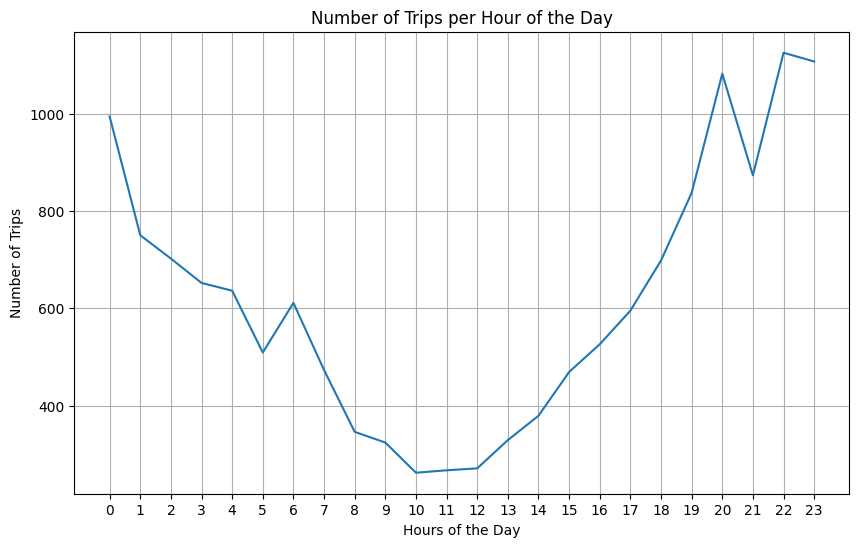

In [45]:
plt.figure(figsize= (10,6))
sns.lineplot(data = hourly_trips, x = 'trip_hour', y = 'trip_uuid')
plt.grid()
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Hour of the Day")
plt.xticks(range(0,24))
plt.show()

We can conclude from the graph that trip starts in the morning 10 am. Starts aggressively increasing after 12 pm. till midnight 12 am. Then again fall stared upto morning 10 O'clock.

###### **Intrested in knowing how many trips are created for different days of the month**

In [46]:
trip['trip_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int32)

In [47]:
daily_trips = trip.groupby(by = 'trip_day')['trip_uuid'].count().to_frame().reset_index()
daily_trips.head()

,trip_day,trip_uuid
0,1,605
1,2,552
2,3,631
3,12,747
4,13,750


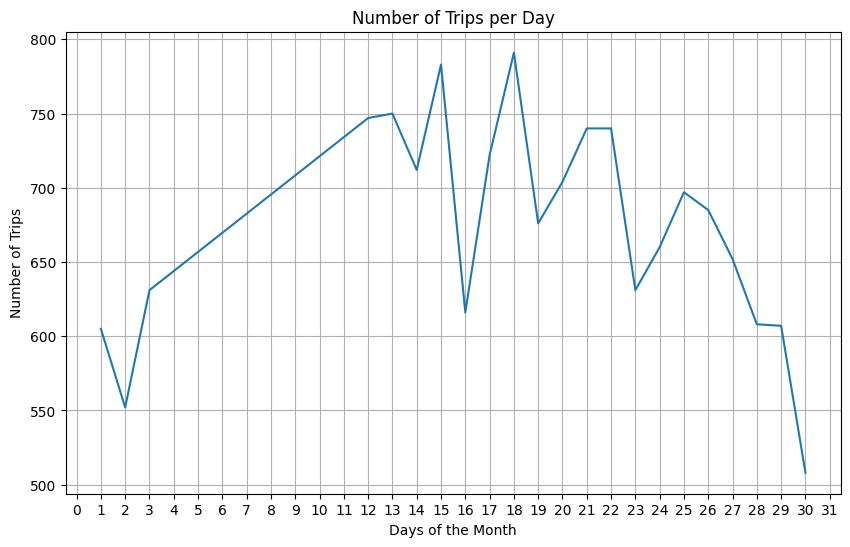

In [48]:
plt.figure(figsize= (10,6))
sns.lineplot(data = daily_trips, x = 'trip_day', y = 'trip_uuid')
plt.grid()
plt.xlabel("Days of the Month")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Day")
plt.xticks(range(0,32))
plt.show()

 - It can be inferred from the above plot that most of the trips are created in the mid of the month.
 - That means customers usually make more orders in the mid of the month.

######**Intrested in knowing how many trips are created in the given two months**

In [49]:
trip_per_month = trip.groupby(by = 'trip_month')['trip_uuid'].count().to_frame().reset_index()
trip_per_month['percent'] = np.round(trip_per_month['trip_uuid']*100/trip_per_month['trip_uuid'].sum(),2)
trip_per_month

,trip_month,trip_uuid,percent
0,9,13029,87.93
1,10,1788,12.07


[]

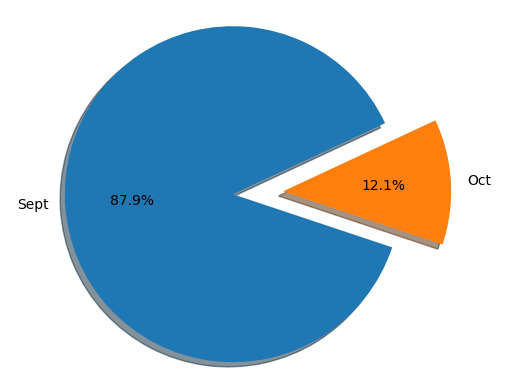

In [50]:
plt.pie(x = trip_per_month['trip_uuid'],
        labels = ['Sept', 'Oct'],
        explode = [0.3, 0],
        shadow = True,
        startangle = 25,
        autopct ='%1.1f%%')
plt.axis('equal')
plt.plot()



####**Route type**

In [51]:
trip_route = trip.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
trip_route['perc'] = np.round(trip_route['trip_uuid'] * 100/ trip_route['trip_uuid'].sum(), 2)
trip_route

<ipython-input-51-81950c378763>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_route = trip.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()


,route_type,trip_uuid,perc
0,Carting,8908,60.12
1,FTL,5909,39.88


[]

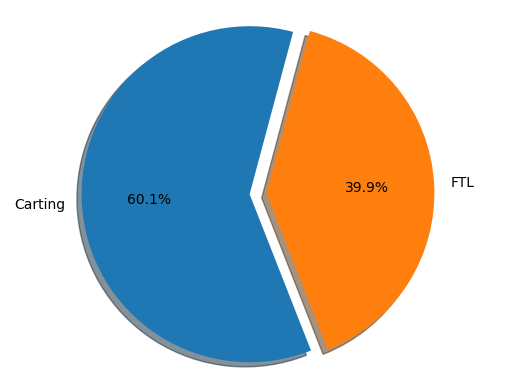

In [52]:
plt.pie(x = trip_route['trip_uuid'],
        labels = ['Carting', 'FTL'],
        explode = [0.1, 0],
        shadow = True,
        startangle = 75,
        autopct ='%1.1f%%')
plt.axis('equal')
plt.plot()

######**distribution of number of trips created from different states**

In [53]:
trip_states = trip.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
trip_states['perc'] = np.round(trip_states['trip_uuid'] * 100/ trip_states['trip_uuid'].sum(), 2)
trip_states = trip_states.sort_values(by = 'trip_uuid', ascending= False)
trip_states.head()

,source_state,trip_uuid,perc
17,Maharashtra,2714,18.34
14,Karnataka,2143,14.48
10,Haryana,1838,12.42
24,Tamil Nadu,1039,7.02
25,Telangana,781,5.28


[]

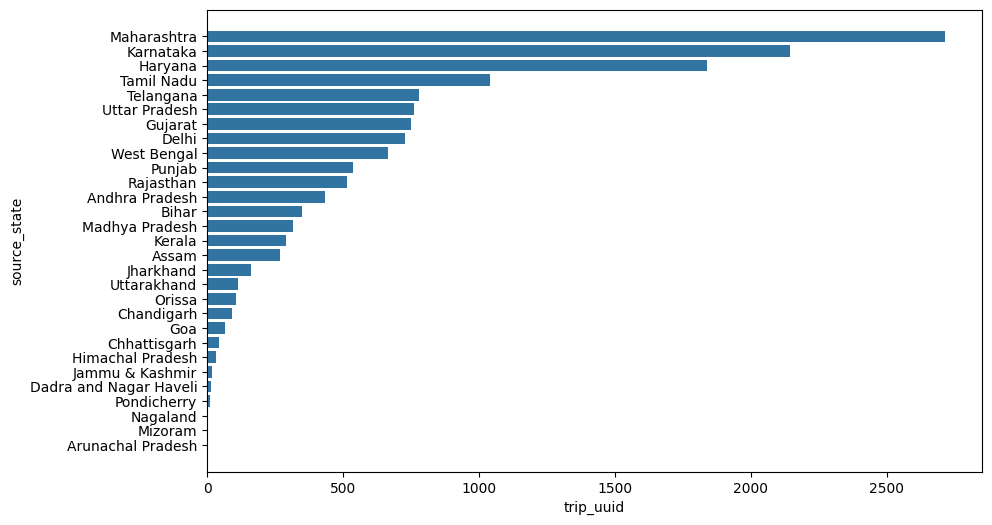

In [54]:
plt.figure(figsize = (10, 6))
sns.barplot(data = trip_states,
            x = trip_states['trip_uuid'],
            y = trip_states['source_state'])
plt.plot()

 - It can be seen in the above plot that maximum trips originated from Maharashtra state followed by Karnataka and Haryana. That means that the seller base is strong in these states

#####**top 30 cities based on the number of trips created from different cities**

In [55]:
trip_city = trip.groupby(by = 'source_City')['trip_uuid'].count().to_frame().reset_index()
trip_city['percent'] = np.round(trip_city['trip_uuid'] * 100/ trip_city['trip_uuid'].sum(), 2)
trip_city = trip_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
trip_city.head()

,source_City,trip_uuid,percent
258,Gurgaon,1139,7.69
86,Bengaluru,1052,7.10
107,Bhiwandi,697,4.70
469,Mumbai,654,4.41
64,Bangalore,648,4.37


[]

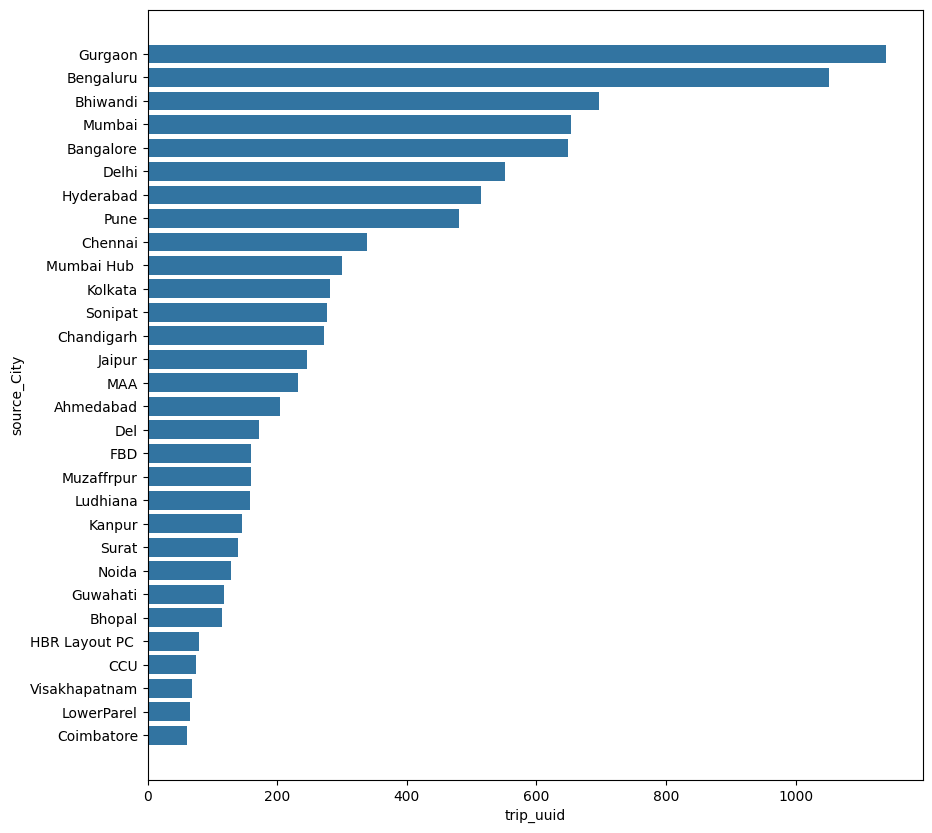

In [56]:
plt.figure(figsize = (10, 10))
sns.barplot(data = trip_city,
            x = trip_city['trip_uuid'],
            y = trip_city['source_City'])
plt.plot()

#####**Which route type use more time to reach destination?**

<ipython-input-57-fbd4f05cfa61>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')


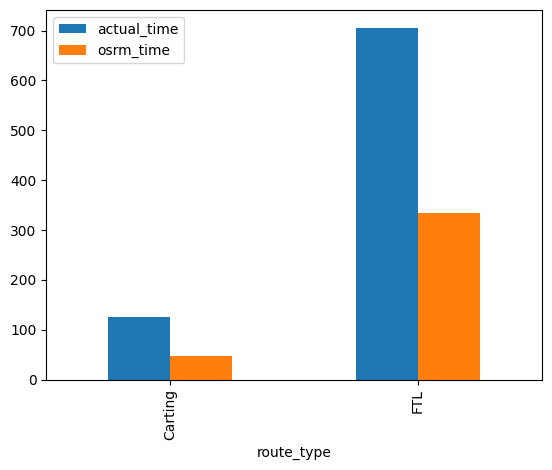

In [57]:
trip.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')
plt.show()

**Weekday with most delivery of the product**

In [58]:
x=trip['trip_dayofweek'].value_counts().to_frame('count').reset_index()
x

,trip_dayofweek,count
0,2,2739
1,5,2130
2,3,2106
3,4,2060
4,1,2040
5,0,1987
6,6,1755


[]

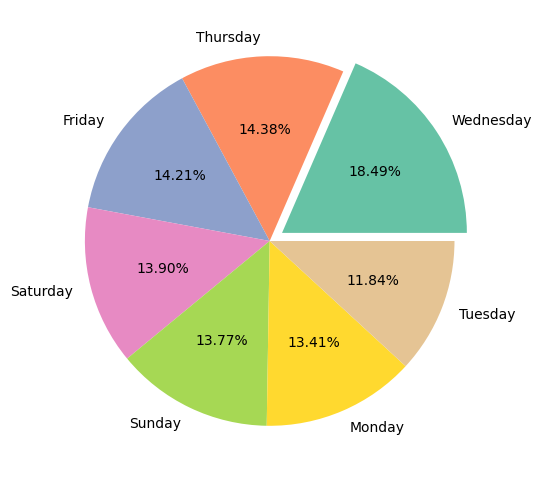

In [59]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=x,
        x=x['count'],
        colors=palette_color,
        labels=['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday','Tuesday'],
        explode=(0.08,0,0,0,0,0,0),
        autopct='%0.2f%%')
plt.plot()

#**4 In-depth analysis**

#####**4.1 Outlier Detection & Treatment**

**4.1.A. any existing outliers in numerical features**

In [60]:
numerical_columns = ['od_time_diff_hour','start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum',
                    'segment_osrm_time_sum', 'segment_osrm_distance_sum']

[]

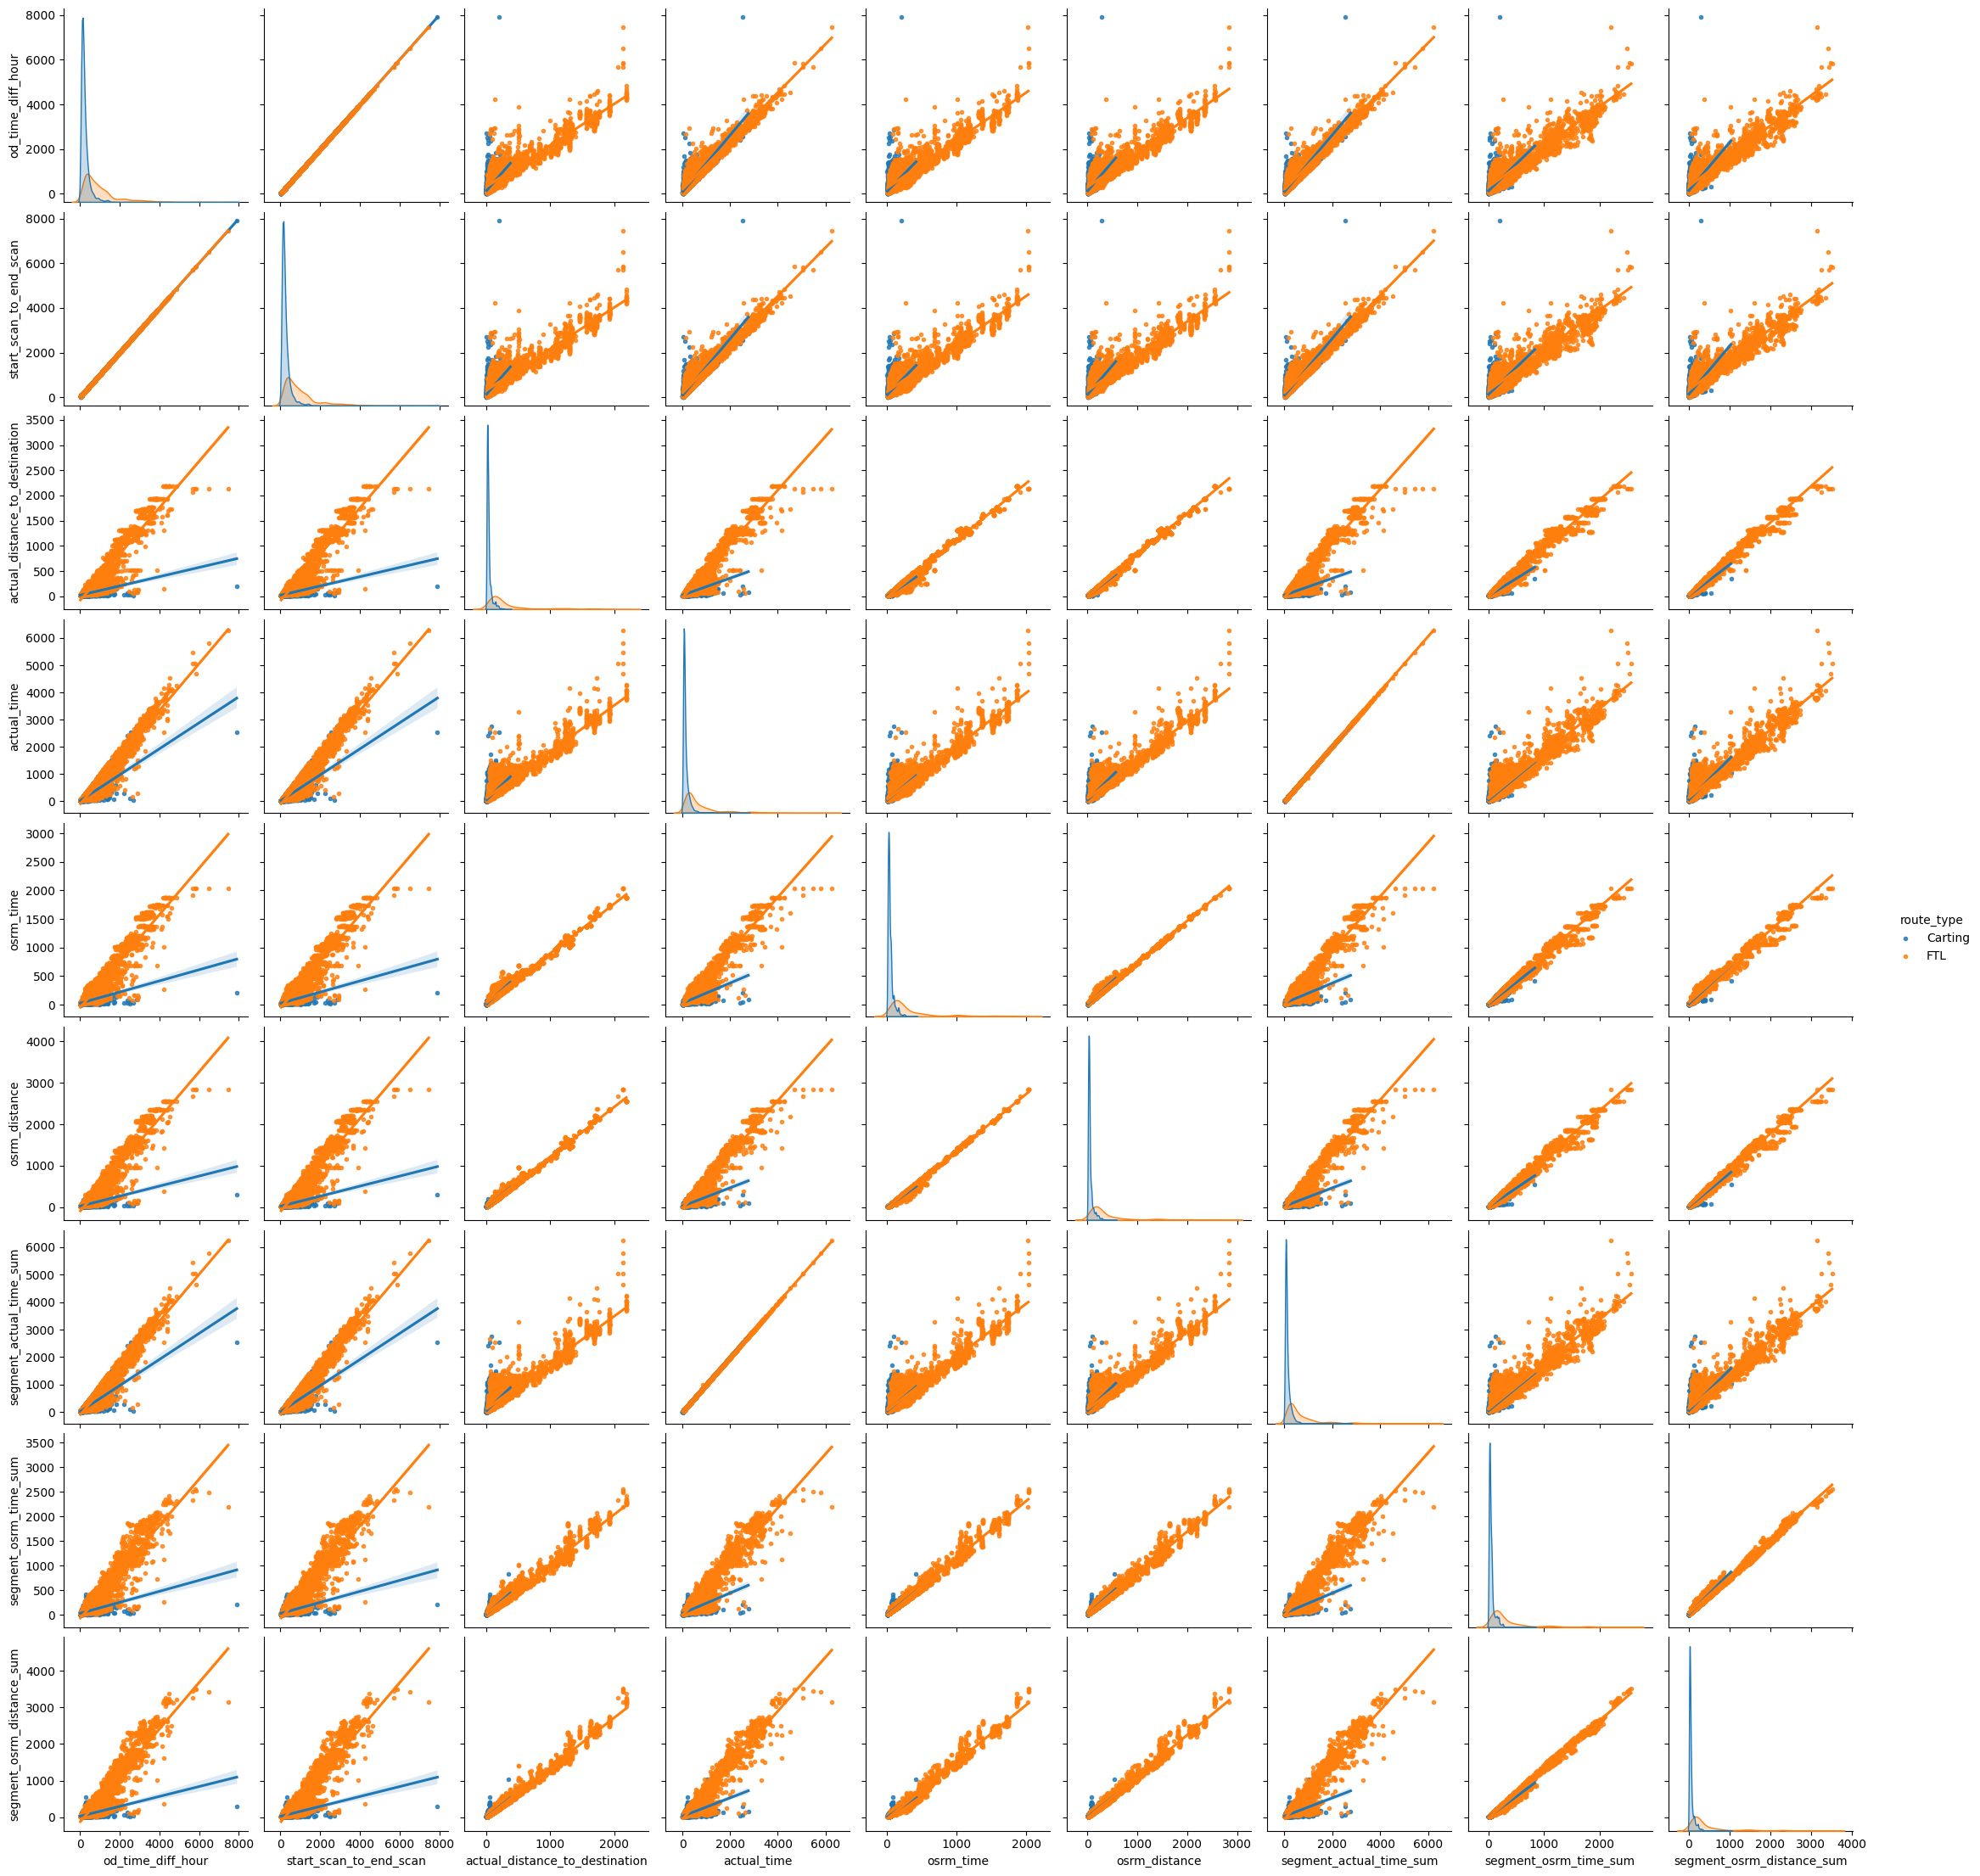

In [61]:
sns.pairplot(data = trip,
             vars = numerical_columns,
             kind = 'reg',
             hue = 'route_type',
             markers = '.')
plt.plot()

**4.1.B. Visualize the outlier values using Boxplot**

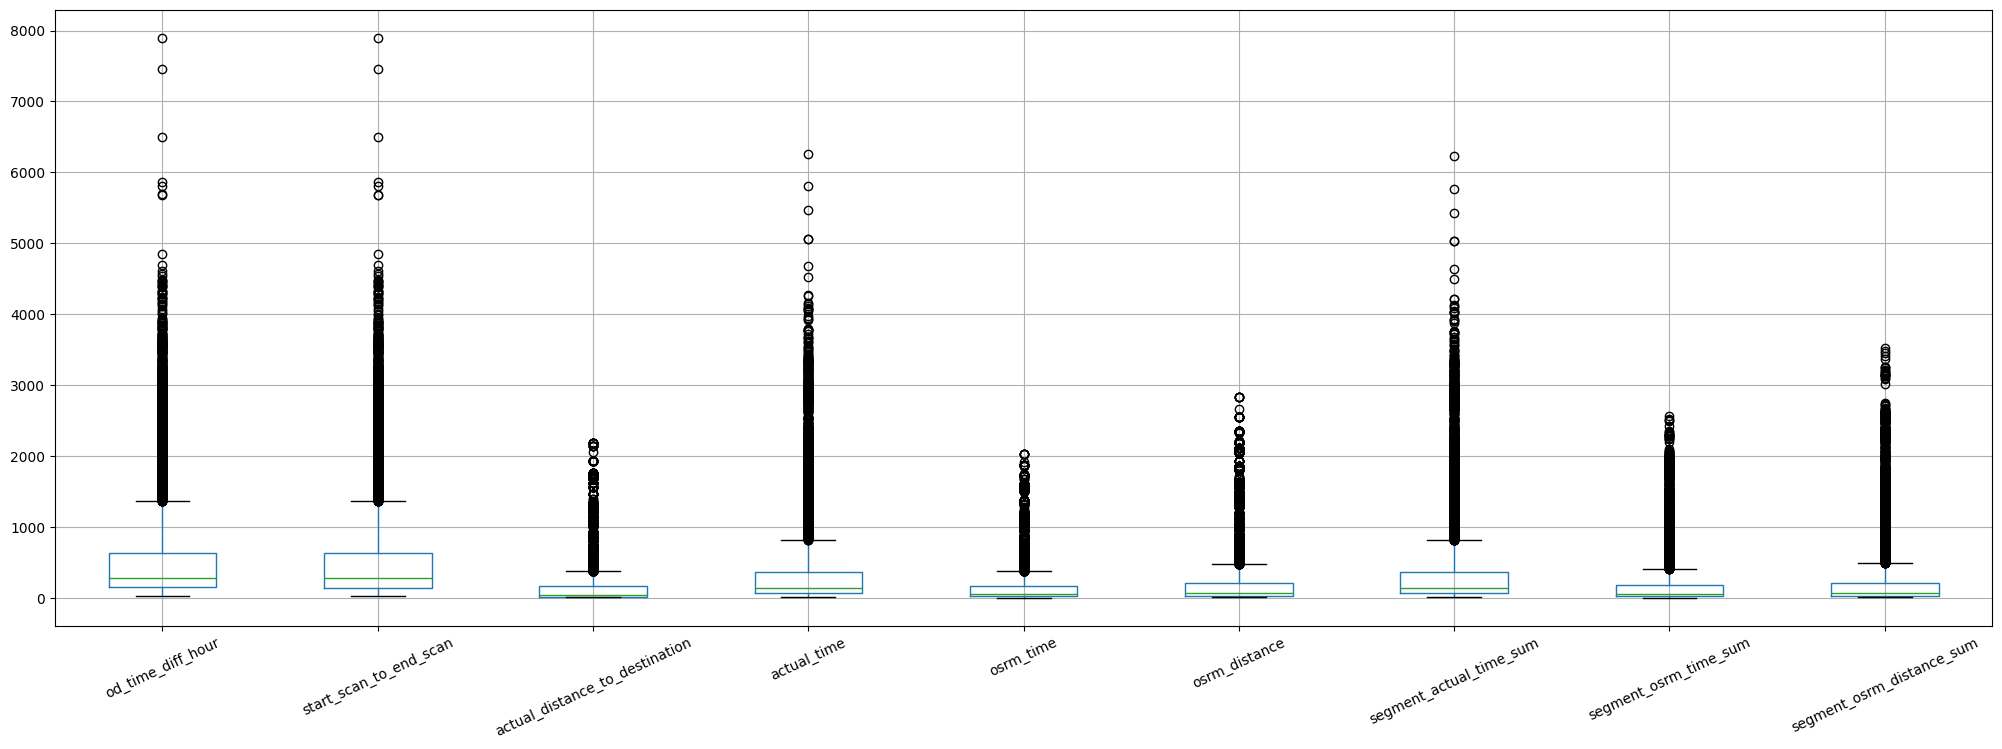

In [62]:
numerical_columns = ['od_time_diff_hour','start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum',
                    'segment_osrm_time_sum', 'segment_osrm_distance_sum']

trip[numerical_columns].boxplot(rot = 25, figsize = (25, 8))
plt.show()

**4.1.C. Handle the outliers using the IQR method.**

In [63]:
trip2 = trip.copy()

In [64]:
Q1 = trip2[numerical_columns].quantile(0.25)
Q3 = trip2[numerical_columns].quantile(0.75)

IQR = Q3 - Q1

Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

Outliers = trip2[~((trip2[numerical_columns]< Lower_bound) | (trip2[numerical_columns] > Upper_bound)).any(axis = 1)]
Outliers = Outliers.reset_index(drop = True)
Outliers

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_City,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,Karnataka,Doddablpur,ChikaDPP,D,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,Maharashtra,Mumbai Hub,None,None,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,...,Karnataka,Bellary,Dc,None,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),189.0,...,Tamil Nadu,Chennai,Poonamallee,None,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,...,Tamil Nadu,Chennai,Chrompet,DPC,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12754,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,...,Punjab,Chandigarh,Mehmdpur,H,2018,10,23,3,40,2
12755,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,...,Haryana,FBD,Balabhgarh,DPC,2018,10,23,3,40,2
12756,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,...,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,10,23,3,40,2
12757,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,...,Tamil Nadu,Tirunelveli,VdkkuSrt,I,2018,10,23,3,40,2


<Axes: >

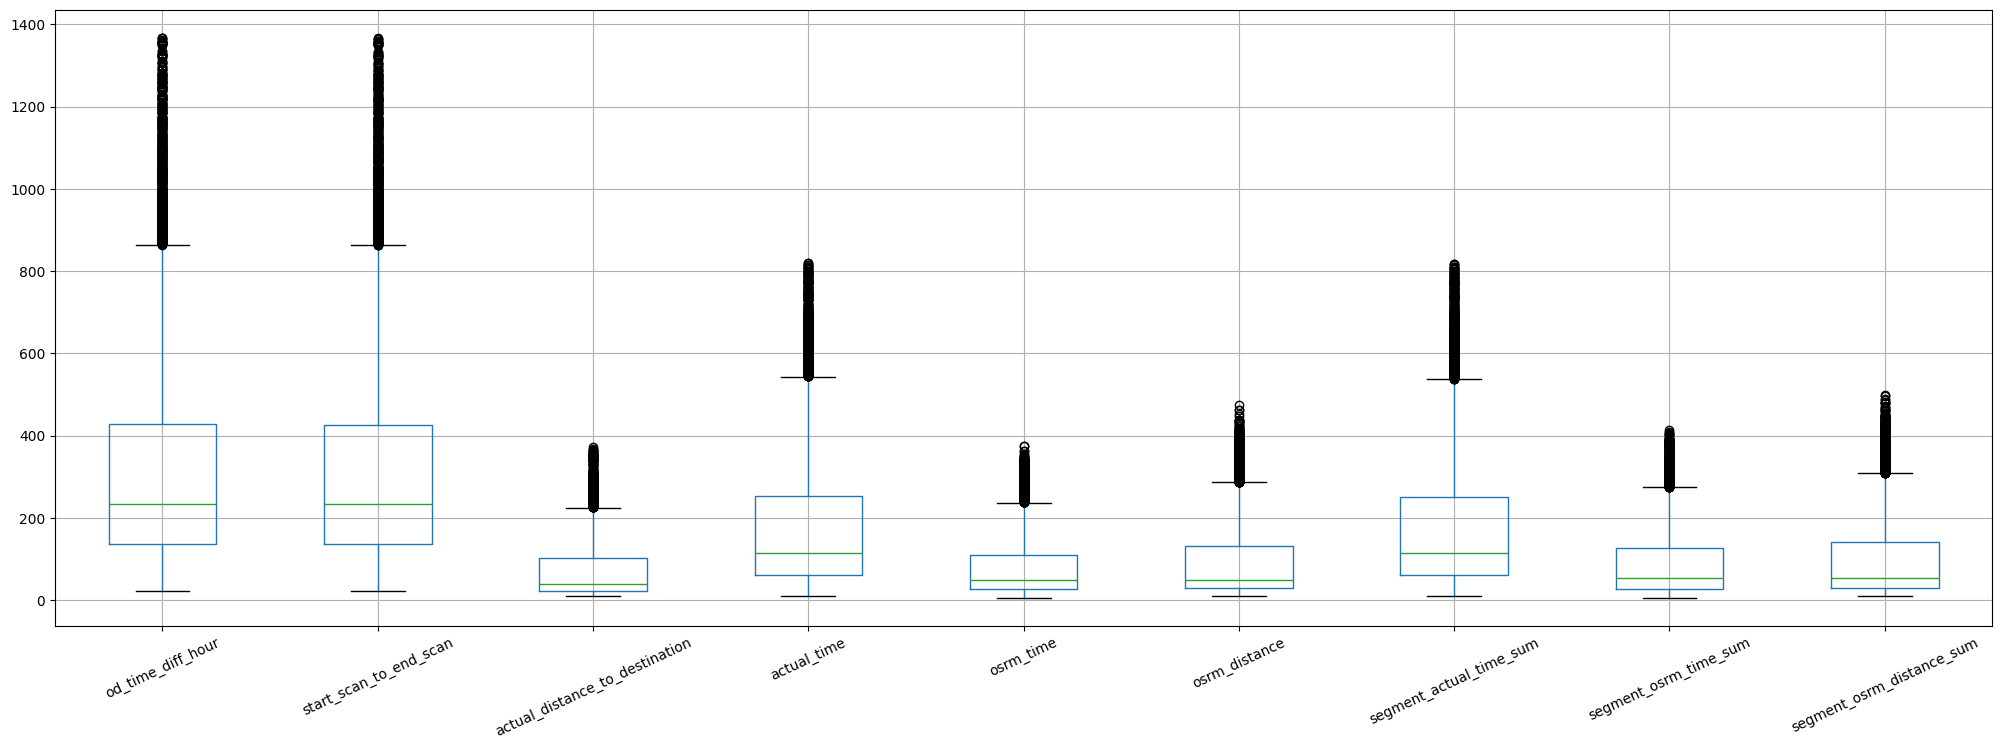

In [65]:
Outliers[numerical_columns].boxplot(rot=25, figsize=(25,8))

#####**4.2 Perform one-hot encoding on categorical features.**

In [66]:
trip2['route_type'].value_counts().to_frame()

,count
route_type,
Carting,8908
FTL,5909


In [67]:
trip2['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

#####**4.3 Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [69]:
scaler = StandardScaler()
Outliers[numerical_columns] = scaler.fit_transform(Outliers[numerical_columns])
Outliers[numerical_columns]

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,-0.548105,-0.551781,0.004976,-0.223508,-0.150681,-0.080602,-0.227130,-0.268226,-0.151645
1,-0.862847,-0.862589,-0.766880,-0.751536,-0.878175,-0.806104,-0.746018,-0.879530,-0.825232
2,1.534486,1.534514,0.752716,1.021129,0.521909,0.603318,1.032122,0.355554,0.504029
3,-0.513666,-0.516816,-0.664606,-0.738964,-0.768365,-0.713134,-0.739690,-0.792201,-0.739473
4,-0.872505,-0.870359,-0.878152,-0.971547,-0.905628,-0.891056,-0.967495,-0.916957,-0.907535
...,...,...,...,...,...,...,...,...,...
12754,-0.251600,-0.252629,-0.207579,-0.600671,-0.233038,-0.209756,-0.600476,-0.305653,-0.354145
12755,-1.017680,-1.017993,-0.789776,-0.990406,-0.919354,-0.845930,-0.986478,-0.941908,-0.864909
12756,0.385089,0.384526,-0.470472,0.650252,-0.425207,-0.371190,0.658775,0.018713,0.065130
12757,0.099486,0.097029,0.852973,0.537103,1.372940,0.872963,0.513234,1.677967,1.307779


In [70]:
Outliers[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
od_time_diff_hour,12759.0,1.102653e-16,1.000039,-1.161744,-0.721800,-0.343392,0.407195,4.052774
start_scan_to_end_scan,12759.0,7.295329e-17,1.000039,-1.161741,-0.722726,-0.341986,0.407837,4.055940
actual_distance_to_destination,12759.0,-7.462397e-17,1.000039,-0.879504,-0.708517,-0.470638,0.415253,4.142566
actual_time,12759.0,-2.227581e-17,1.000039,-1.065838,-0.738964,-0.399517,0.474243,4.032144
osrm_time,12759.0,-7.685155e-17,1.000039,-1.001712,-0.713459,-0.397754,0.439551,4.077023
osrm_distance,12759.0,-1.113791e-17,1.000039,-0.923716,-0.709638,-0.484153,0.438270,4.232902
segment_actual_time_sum,12759.0,-3.786888e-17,1.000039,-1.062413,-0.739690,-0.397984,0.468939,4.056857
segment_osrm_time_sum,12759.0,-8.576188e-17,1.000039,-1.004286,-0.729823,-0.417933,0.505261,4.073281
segment_osrm_distance_sum,12759.0,-4.677921e-17,1.000039,-0.938386,-0.724554,-0.464935,0.448091,4.180276


In [71]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_state,source_City,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,...,Uttar Pradesh,Kanpur,Central,H_6,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,Karnataka,Doddablpur,ChikaDPP,D,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,...,Haryana,Gurgaon,Bilaspur,HB,2018,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,Maharashtra,Mumbai Hub,None,None,2018,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,...,Karnataka,Bellary,Dc,None,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,...,Punjab,Chandigarh,Mehmdpur,H,2018,10,23,3,40,2
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,...,Haryana,FBD,Balabhgarh,DPC,2018,10,23,3,40,2
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,...,Uttar Pradesh,Kanpur,GovndNgr,DC,2018,10,23,3,40,2
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,...,Tamil Nadu,Tirunelveli,VdkkuSrt,I,2018,10,23,3,40,2


#**5. Hypothesis Testing**

##### **1.  Do hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [72]:
trip[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143768,161.384018
std,561.395020,271.362549
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


As we create trip data using aggregation of segments which contain trip_uuid. So we don't need aggregate the data now.

- Visual Tests to know if the samples follow normal distribution

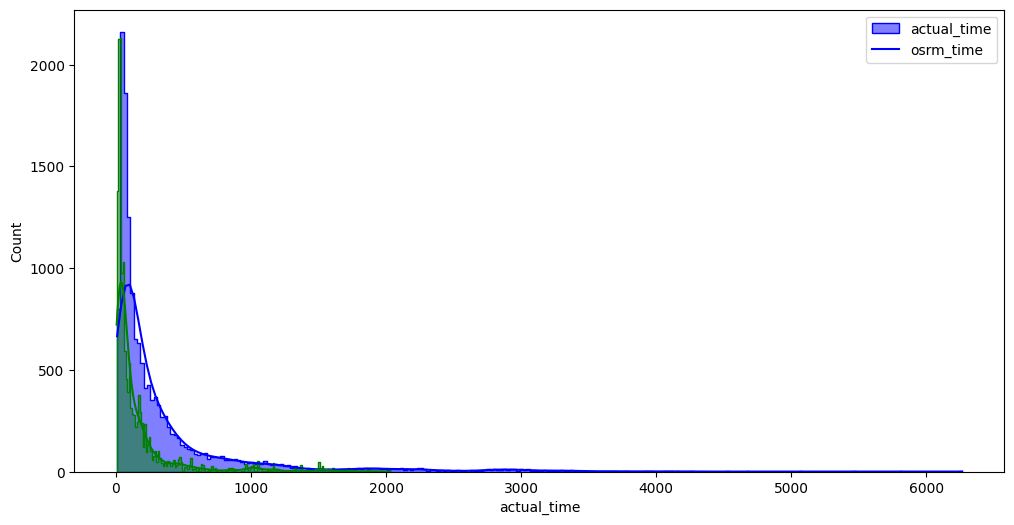

In [73]:
plt.figure(figsize = (12, 6))
sns.histplot(data = trip['actual_time'],element= 'step', color='blue', kde= True)
sns.histplot(data = trip['osrm_time'], element= 'step', color='green', kde= True)
plt.legend(['actual_time', 'osrm_time'])
plt.show()

Distribution check using **QQ Plot**

[]

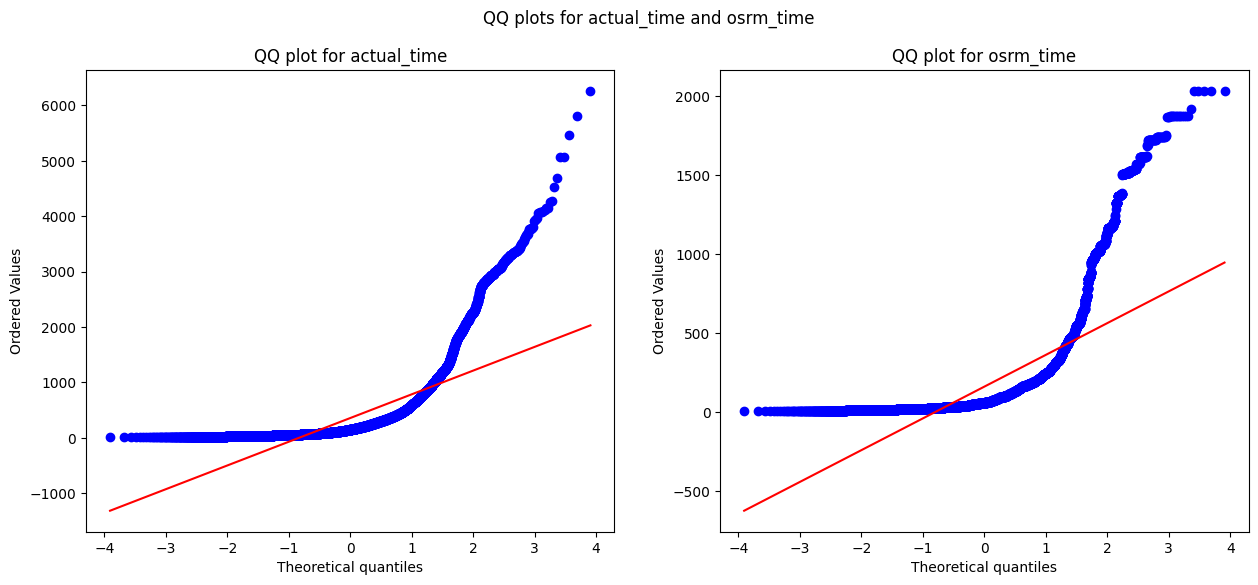

In [74]:
import scipy.stats as spy
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(trip['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(trip['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

- Applying Shapiro-Wilk test for normality

$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [75]:
t_stat, p_value = spy.shapiro(trip['actual_time'].sample(5000))
print(f'Test Statistics : {t_stat}')
print(f'p-value : {p_value}')
alpha = 0.05
if p_value > alpha:
  print('The test follows normal distribution')
else:
  print('The test does not follow normal distribution')

Test Statistics : 0.5832450610399265
p-value : 2.920382810596967e-76
The test does not follow normal distribution


In [76]:
t_stat, p_value = spy.shapiro(trip['osrm_time'].sample(5000))
print(f'Test Statistics : {t_stat}')
print(f'p-value : {p_value}')
alpha = 0.05
if p_value > alpha:
  print('The test follows normal distribution')
else:
  print('The test does not follow normal distribution')

Test Statistics : 0.5498143118182075
p-value : 6.762204431248006e-78
The test does not follow normal distribution


-  Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [77]:
transformed_actual_time = spy.boxcox(trip['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0587206011714705e-28
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [78]:
transformed_osrm_time = spy.boxcox(trip['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.5114710538974565e-35
The sample does not follow normal distribution


- Even after applying the boxcox transformation on each of the "actual_time" and "osrm_time" columns, the distributions do not follow normal distribution.

* Homogeneity of Variances using **Lavene's test**

In [79]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(trip['actual_time'], trip['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.871098057987424e-220
The samples do not have  Homogenous Variance


 Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e.,Wilcoxon Signed-Rank Test for two dependent samples

In [80]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(trip['actual_time'], trip['osrm_time'])
print("Wilcoxon test p-value:", p)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

Wilcoxon test p-value: 0.0
The samples are not similar


-  Since p-value < alpha therfore it can be concluded that actual_time and osrm_time are not similar.

##### **2.  Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [81]:
trip[['actual_time', 'segment_actual_time_sum']].describe()

,actual_time,segment_actual_time_sum
count,14817.000000,14817.000000
mean,357.143768,353.892273
std,561.395020,556.246826
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,6265.000000,6230.000000


 - Visual Tests to know if the samples follow normal distribution

[]

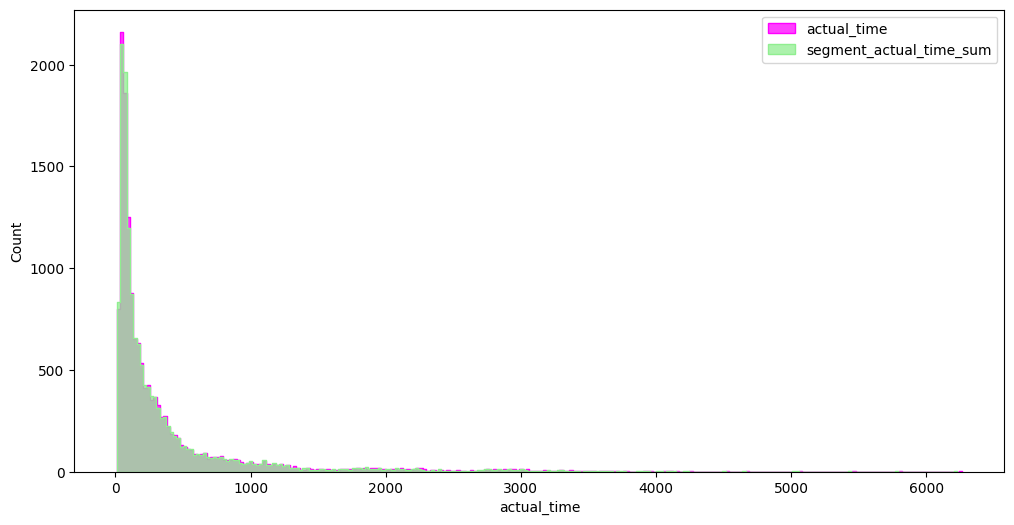

In [82]:
plt.figure(figsize = (12, 6))
sns.histplot(trip['actual_time'], element = 'step', color = 'magenta')
sns.histplot(trip['segment_actual_time_sum'], element = 'step', color = 'lightgreen')
plt.legend(['actual_time', 'segment_actual_time_sum'])
plt.plot()

* Distribution check using **QQ Plot**

[]

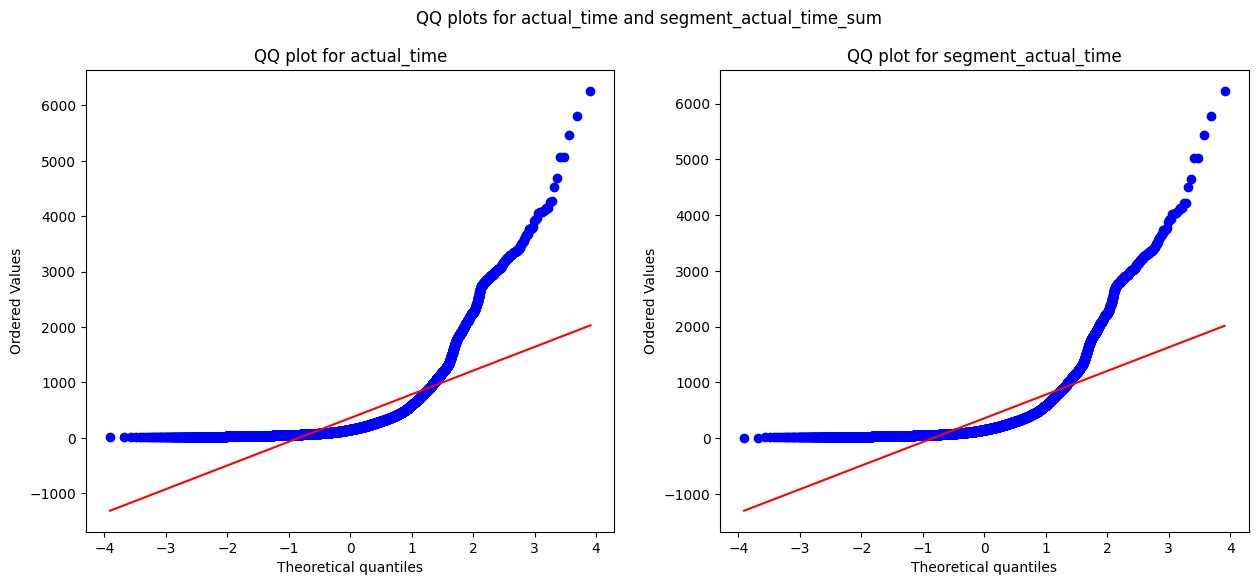

In [83]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time_sum')
spy.probplot(trip['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(trip['segment_actual_time_sum'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

 It can be seen from the above plots that the samples do not come from normal distribution.

 - Applying Shapiro-Wilk test for normality

$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [84]:
test_stat, p_value = spy.shapiro(trip['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.8389707462020593e-76
The sample does not follow normal distribution


In [85]:
test_stat, p_value = spy.shapiro(trip['segment_actual_time_sum'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.597258603492534e-77
The sample does not follow normal distribution


 - Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [86]:
transformed_actual_time = spy.boxcox(trip['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0587206011714705e-28
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [87]:
transformed_segment_actual_time_sum = spy.boxcox(trip['segment_actual_time_sum'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_actual_time_sum)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.921641909608647e-29
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the "actual_time" and "segment_actual_time" columns, the distributions do not follow normal distribution.

* Homogeneity of Variances using **Lavene's test**

In [88]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(trip['actual_time'], trip['segment_actual_time_sum'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.695502241317651
The samples have Homogenous Variance 


-  Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e.,Wilcoxon Signed-Rank Test for two dependent samples

In [89]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(trip['actual_time'], trip['segment_actual_time_sum'])
print("Wilcoxon test p-value:", p)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

Wilcoxon test p-value: 0.0
The samples are similar 


Since p-value > alpha therfore it can be concluded that actual_time and segment_actual_time are similar.

##### **3. Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [90]:
trip[['osrm_distance', 'segment_osrm_distance_sum']].describe()

,osrm_distance,segment_osrm_distance_sum
count,14817.000000,14817.000000
mean,204.344711,223.201157
std,370.395508,416.628326
min,9.072900,9.072900
25%,30.819201,32.654499
50%,65.618805,70.154404
75%,208.475006,218.802399
max,2840.081055,3523.632324


 - Visual Tests to know if the samples follow normal distribution

[]

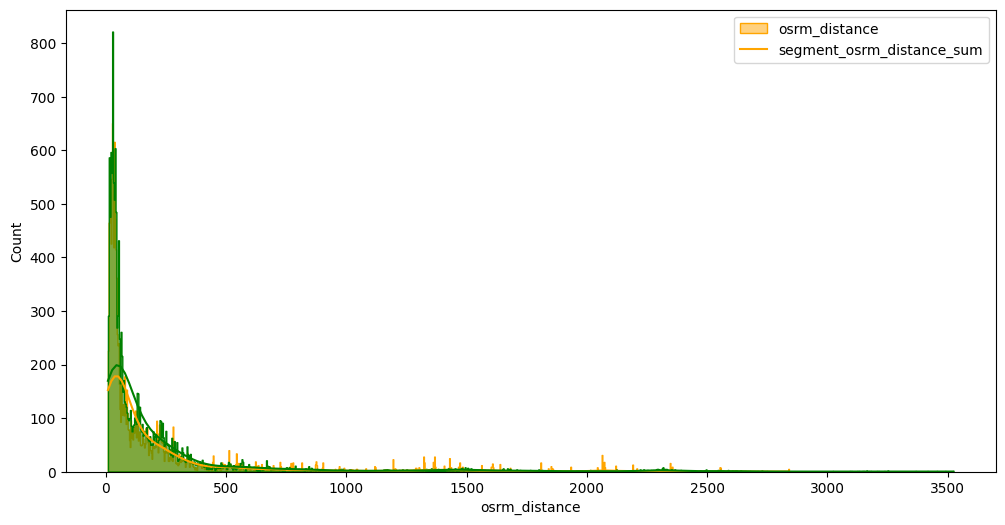

In [91]:
plt.figure(figsize = (12,6))
sns.histplot(trip['osrm_distance'], element = 'step', color = 'orange', bins = 1000, kde= True)
sns.histplot(trip['segment_osrm_distance_sum'], element = 'step', color = 'green', bins = 1000, kde= True)
plt.legend(['osrm_distance', 'segment_osrm_distance_sum'])
plt.plot()

* Distribution check using **QQ Plot**

[]

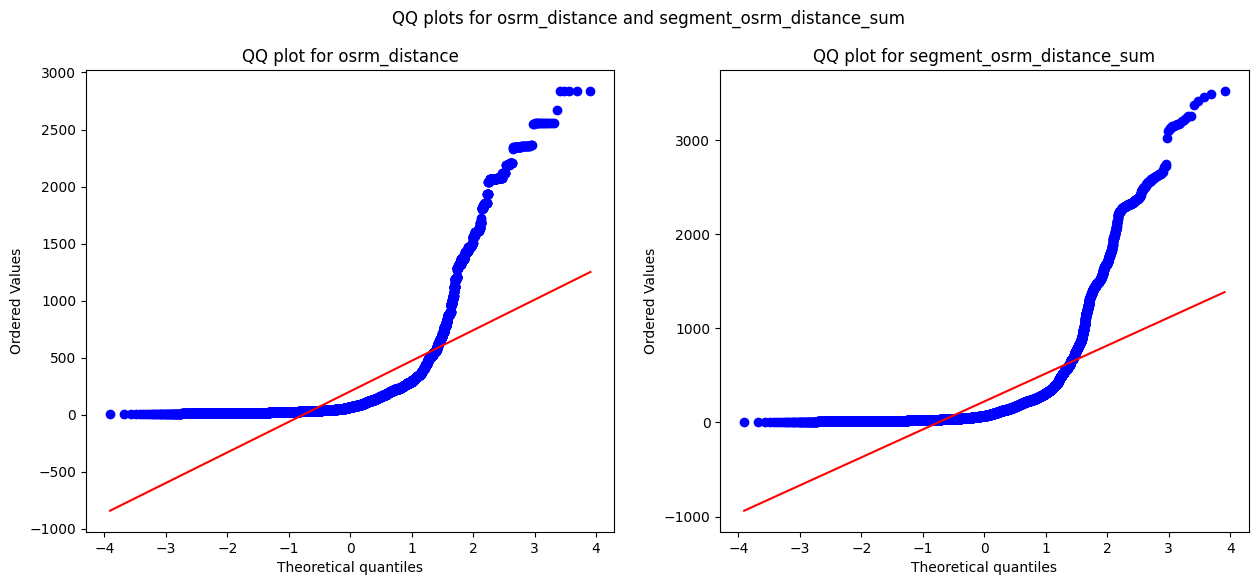

In [92]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance_sum')
spy.probplot(trip['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1,2,2)
spy.probplot(trip['segment_osrm_distance_sum'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance_sum')
plt.plot()

From the visuals we can clearly say that the data is not normally distributed

 - Applying Shapiro-Wilk test for normality

$H_O$ : The sample **follows normal distribution**
$H_1$ : The sample **follows normal distribution**

alpha = 0.05

In [93]:
test_stat, p_value = spy.shapiro(trip['osrm_distance'].sample(5000))
print('p_value: ', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p_value:  3.223784950365842e-79
The sample does not follow normal distribution


In [94]:
test_stat, p_value = spy.shapiro(trip['segment_osrm_distance_sum'].sample(5000))
print('p_value: ', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p_value:  9.181617856039773e-80
The sample does not follow normal distribution


 - Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [95]:
transformed_osrm_distance = spy.boxcox(trip['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p_value: ', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p_value:  7.095555476888255e-41
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [96]:
transformed_osrm_distance_sum = spy.boxcox(trip['segment_osrm_distance_sum'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance_sum)
print('p_value: ', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p_value:  3.052240944832899e-38
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "osrm_distance" and "segment_osrm_distance" columns, the distributions do not follow normal distribution.

- Homogeneity of Variances using **Lavene's test**

In [97]:
#Ho = HOmogenous variance
#HA = Non homogenous variance
test_stat, p_value = spy.levene(trip['osrm_distance'], trip['segment_osrm_distance_sum'])
print('p_value: ', p_value)
if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p_value:  0.00020976006524780905
The samples do not have Homogenous Variance


 Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e.,Wilcoxon Signed-Rank Test for two dependent samples

In [98]:
from scipy.stats import wilcoxon

test_stat, p_value = wilcoxon(trip['osrm_distance'], trip['segment_osrm_distance_sum'])
print('p_value: ', p_value)
if p_value < 0.05:
  print('The samples are not similar')
else:
  print('The samples are similar')

p_value:  0.0
The samples are not similar


Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance are  not similar.

#####**4. Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [99]:
trip[['osrm_time', 'segment_osrm_time_sum']].describe()

,osrm_time,segment_osrm_time_sum
count,14817.000000,14817.000000
mean,161.384018,180.949783
std,271.362549,314.541412
min,6.000000,6.000000
25%,29.000000,31.000000
50%,60.000000,65.000000
75%,168.000000,185.000000
max,2032.000000,2564.000000


- Visual Tests to know if the samples follow normal distribution

[]

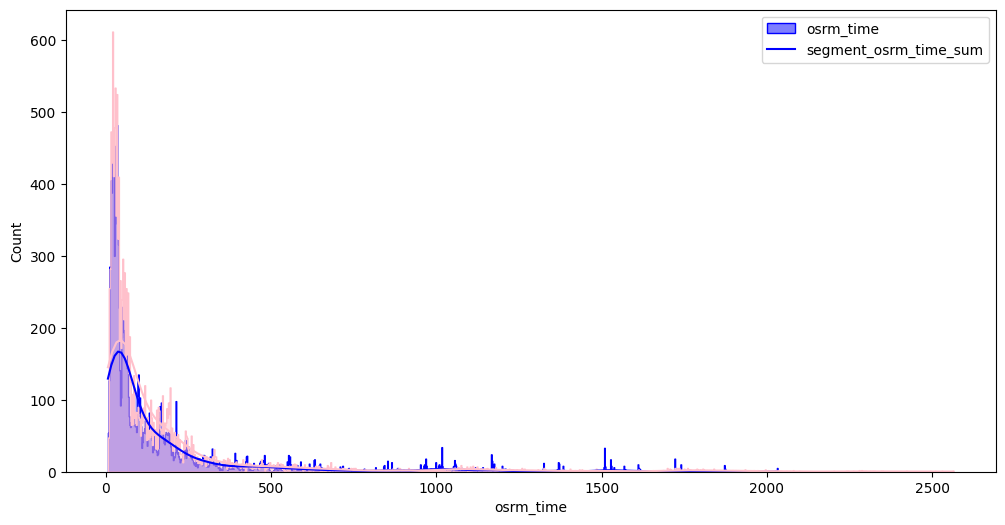

In [100]:
plt.figure(figsize = (12, 6))
sns.histplot(trip['osrm_time'], element = 'step', color = 'blue', kde = True, bins = 1000)
sns.histplot(trip['segment_osrm_time_sum'], element = 'step', color = 'pink', kde = True, bins = 1000)
plt.legend(['osrm_time', 'segment_osrm_time_sum'])
plt.plot()

- Visualisation using QQ plot

[]

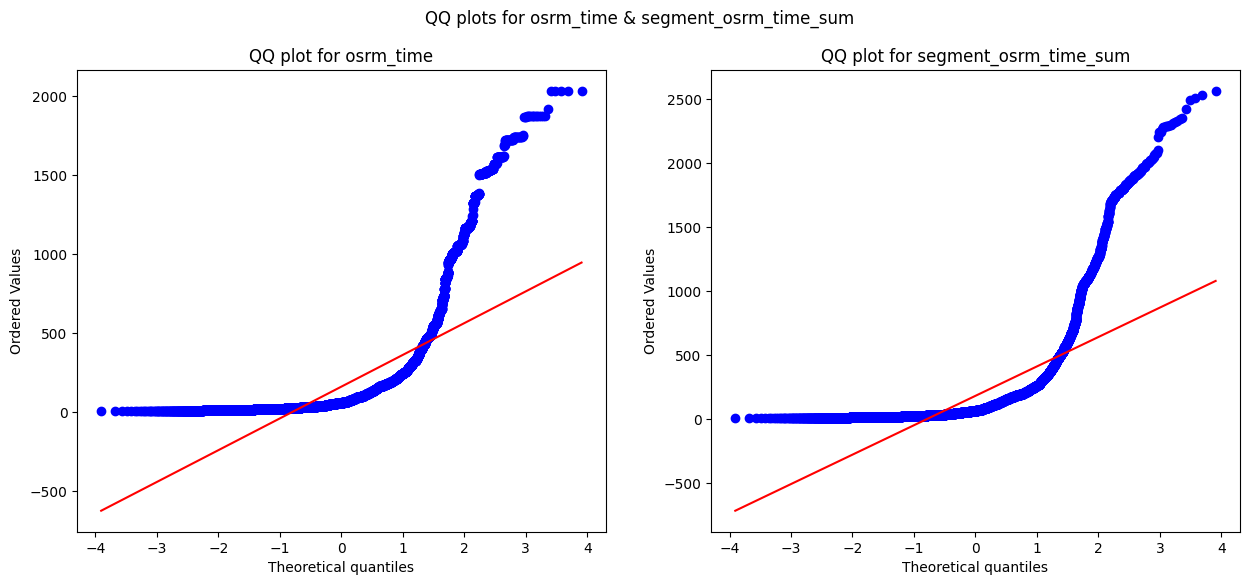

In [101]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.suptitle('QQ plots for osrm_time & segment_osrm_time_sum')
spy.probplot(trip['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1,2,2)
spy.probplot(trip['segment_osrm_time_sum'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time_sum')
plt.plot()

From the visuals we can clearly say that the data is not normally distributed

$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [102]:
test_stat, p_value = spy.shapiro(trip['osrm_time'].sample(5000))
print('p_value: ', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p_value:  4.530125379088406e-78
The sample does not follow normal distribution


In [103]:
test_stat, p_value = spy.shapiro(trip['segment_osrm_time_sum'].sample(5000))
print('p_value: ', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p_value:  2.5876758225205347e-78
The sample does not follow normal distribution


 - Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [104]:
transformed_osrm_time = spy.boxcox(trip['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p_value: ', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p_value:  3.5114710538974565e-35
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14817.
  res = hypotest_fun_out(*samples, **kwds)


In [105]:
transformed_segment_osrm_time_sum = spy.boxcox(trip['segment_osrm_time_sum'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_time_sum)
print('p_value: ', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p_value:  4.880441318638605e-34
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "osrm_time" and "segment_osrm_time" columns, the distributions do not follow normal distribution.

* Homogeneity of Variances using **Lavene's test**

In [106]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(trip['osrm_time'], trip['segment_osrm_time_sum'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 8.349506135727595e-08
The samples do not have Homogenous Variance


Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e.,Wilcoxon Signed-Rank Test for two dependent samples

In [107]:
from scipy.stats import wilcoxon

test_stat, p_value = wilcoxon(trip['osrm_time'], trip['segment_osrm_time_sum'])
print('p_value: ', p_value)
if p_value < 0.05:
  print('The samples are not similar')
else:
  print('The samples are similar')

p_value:  0.0
The samples are not similar


 Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are  not similar.

#**6. Business Insights & Recommendations**

**Insights -**
The dataset has 24 columns with 144867 records.
Missing values are found in source_name and destination_name.
There are lot of duplicate records, which can be handled my cumulative aggregation on few columns and taking the last record of few columns.
After deleting duplicate records, insignificant columns and creating necessary features, we have 30 columns with 21207 records.
Segment between Bangalore_Nelmngla_H, Karnataka and Bengaluru_KGAirprt_HB,Karnataka is the most used segment.
Gurgaon_Bilaspur_HB, Haryana is the centre with highest traffic.
There is one record for every trip.In Carting, Pappadahandi_Central_DPP_2, Orissa to Visakhapatnam_Gajuwaka_IP, Andhra Pradesh is the longest trip. In FTL, trip from Guwahati_Hub, Assam to Bhiwandi_Mankoli_HB, Maharashtra is the longest trip.
All numerical columns had outliers as the features are highly variant.



**Recommendations -**
As the actual distances and times are greater than the OSRM distances and times, the trip can be completed before estimated time and in lesser budget.
Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.
Huge number of trips are done is Karnataka followed by Maharastra. There is need to plan resources for these two states.
Trip from and to Bengaluru and Mumbai are highest. So allocating enough transporters to these cities is needed.
Trips with longer durations should be optimized by choosing different mode of transport.